In [1]:
import pandas as pd

In [3]:
zinc250k=pd.read_csv("250k_rndm_zinc_drugs_clean.csv")
zinc10k=pd.read_csv("ZINC_10K_metrics.csv")
gcpn_old_pt=pd.read_csv("gcpn_old_pt.csv")
gcpn_old_ft=pd.read_csv("gcpn_old_ft.csv")
gcpn_new_pt=pd.read_csv("gcpn_250k_10k.csv")

In [54]:
gcpn_new_pt_filtered=gcpn_new_pt.loc[~gcpn_new_pt['smiles'].isin(zinc250k['smiles'])].groupby('smiles').first().reset_index()
gcpn_old_pt_filtered=gcpn_old_pt.loc[~gcpn_old_pt['smiles'].isin(zinc250k['smiles'])].groupby('smiles').first().reset_index()
gcpn_old_ft_filtered=gcpn_old_ft.loc[~gcpn_old_ft['smiles'].isin(zinc250k['smiles'])].groupby('smiles').first().reset_index()
gcpn_new_pt_filtered['source']="gcpn_new_pt_filtered"
gcpn_old_pt_filtered['source']="gcpn_old_pt_filtered"
gcpn_old_ft_filtered['source']="gcpn_old_ft_filtered"

In [55]:
all_combined=pd.concat([
    gcpn_new_pt_filtered,
    gcpn_old_pt_filtered,
    gcpn_old_ft_filtered,
],axis=0).groupby('smiles').first().reset_index()

In [57]:
all_combined.to_csv("all_combined_unique_novel.csv",index=False)

In [20]:
len(gcpn_new_pt_filtered),len(gcpn_old_pt_filtered),len(gcpn_old_ft_filtered),len(all_combined)

(9750, 9747, 14, 19287)

In [17]:
len(set(gcpn_new_pt_filtered['smiles'])&set(gcpn_old_pt_filtered['smiles']))

224

In [22]:
all_combined['qed_times_logp']=all_combined['logp_rdkit']*all_combined['qed']

In [40]:
#compliant to lipinsky's rule-of-five
all_combined['R5'] = \
    (all_combined['hbd(NHOH)']<=5) *\
    (all_combined['hba(NO)']<=10) *\
    (all_combined['mwt']<=500) *\
    (all_combined['logp_rdkit']<=5).astype(float)

In [44]:
all_combined

,smiles,mwt,logp_rdkit,qed,sascore,hba(NO),hbd(NHOH),plogp,cycle_score,heavy_atom_count,qed_times_logp,R5
0,BrC1=CC(C2=CC=CC=C2)=CC=C1,231.988762,3.8138,0.694585,1.280598,0,0,0.025981,0,13,2.649008,1.0
1,BrC1=CC(C2C3=CC=CC=C3C3CC2C3)=CC=C1,298.035713,5.0882,0.687907,3.346220,0,0,2.416792,0,18,3.500209,0.0
2,BrC1=CC2=CC=C1CCCC=C2,222.004412,3.8717,0.627059,3.970737,0,0,-0.089985,-3,12,2.427786,1.0
3,BrC1=CC=C2C=CC=CC2=C1,205.973112,3.2576,0.618555,1.371938,0,0,-0.851979,0,11,2.015004,1.0
4,BrC1=CC=C2CCCCC2=C1,210.004412,3.7056,0.616954,1.765593,0,0,-0.494534,0,11,2.286184,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19282,OC1=C2C(=CC=C1)CC1=CC=CC=C12,182.073165,3.1210,0.566349,1.920924,1,1,-0.386411,0,14,1.767574,1.0
19283,OC1=CC=C2C(=C1)C1=CC3C4=CC=C(Br)C=C4CC(C4C2=CC...,532.140178,8.6900,0.359262,6.502062,1,1,8.923504,-3,36,3.121991,0.0
19284,OC1CC2=CC=CC=C2C2=CC=CC=C21,196.088815,2.5962,0.686469,2.330768,1,1,0.168259,0,15,1.782212,1.0
19285,OCC1=CC=CN1C1=CC=C2C=C3C(=CC2=C1)C=CC=CC=C3C1=...,375.162314,6.1375,0.457210,2.834290,2,1,5.484568,-2,29,2.806125,0.0


In [41]:
all_combined.describe()

,mwt,logp_rdkit,qed,sascore,hba(NO),hbd(NHOH),plogp,cycle_score,heavy_atom_count,qed_times_logp,R5
count,19287.000000,19287.000000,19287.000000,19287.000000,19287.000000,19287.000000,19287.000000,19287.000000,19287.000000,19287.000000,19287.000000
mean,248.250348,4.965669,0.607268,3.497070,0.399959,0.077358,2.745164,-1.250687,18.601752,2.954641,0.546534
std,62.250277,1.341644,0.098810,1.351280,0.524951,0.269484,2.049505,2.336768,4.868285,0.667940,0.497843
min,80.062600,0.099120,0.144152,1.000000,0.000000,0.000000,-3.276953,-22.000000,6.000000,0.063730,0.000000
25%,207.593731,4.086050,0.551214,2.466457,0.000000,0.000000,1.388033,-2.000000,15.000000,2.552912,0.000000
50%,239.167400,4.863800,0.617282,3.248894,0.000000,0.000000,2.477249,0.000000,18.000000,3.073189,1.000000
75%,279.198700,5.699800,0.670996,4.355672,1.000000,0.000000,3.799329,0.000000,21.000000,3.441250,1.000000
max,532.140178,12.069400,0.924362,8.469614,3.000000,2.000000,11.490236,0.000000,38.000000,5.156981,1.000000


<Axes: ylabel='count'>

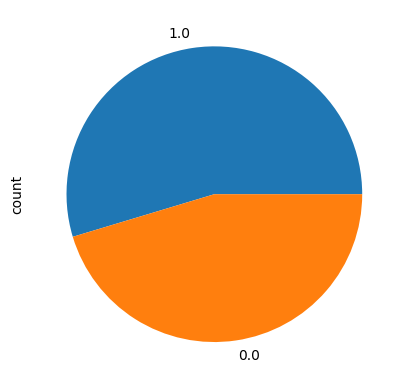

In [42]:
all_combined['R5'].value_counts().plot.pie()

In [53]:
all_combined.drop_duplicates()

,smiles,mwt,logp_rdkit,qed,sascore,hba(NO),hbd(NHOH),plogp,cycle_score,heavy_atom_count,qed_times_logp,R5
0,BrC1=CC(C2=CC=CC=C2)=CC=C1,231.988762,3.8138,0.694585,1.280598,0,0,0.025981,0,13,2.649008,1.0
1,BrC1=CC(C2C3=CC=CC=C3C3CC2C3)=CC=C1,298.035713,5.0882,0.687907,3.346220,0,0,2.416792,0,18,3.500209,0.0
2,BrC1=CC2=CC=C1CCCC=C2,222.004412,3.8717,0.627059,3.970737,0,0,-0.089985,-3,12,2.427786,1.0
3,BrC1=CC=C2C=CC=CC2=C1,205.973112,3.2576,0.618555,1.371938,0,0,-0.851979,0,11,2.015004,1.0
4,BrC1=CC=C2CCCCC2=C1,210.004412,3.7056,0.616954,1.765593,0,0,-0.494534,0,11,2.286184,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19282,OC1=C2C(=CC=C1)CC1=CC=CC=C12,182.073165,3.1210,0.566349,1.920924,1,1,-0.386411,0,14,1.767574,1.0
19283,OC1=CC=C2C(=C1)C1=CC3C4=CC=C(Br)C=C4CC(C4C2=CC...,532.140178,8.6900,0.359262,6.502062,1,1,8.923504,-3,36,3.121991,0.0
19284,OC1CC2=CC=CC=C2C2=CC=CC=C21,196.088815,2.5962,0.686469,2.330768,1,1,0.168259,0,15,1.782212,1.0
19285,OCC1=CC=CN1C1=CC=C2C=C3C(=CC2=C1)C=CC=CC=C3C1=...,375.162314,6.1375,0.457210,2.834290,2,1,5.484568,-2,29,2.806125,0.0


In [48]:
all_combined.sort_values('qed_times_logp',ascending=False).query('R5')

,smiles,mwt,logp_rdkit,qed,sascore,hba(NO),hbd(NHOH),plogp,cycle_score,heavy_atom_count,qed_times_logp,R5
0,BrC1=CC(C2=CC=CC=C2)=CC=C1,231.988762,3.8138,0.694585,1.280598,0,0,0.025981,0,13,2.649008,1.0
0,BrC1=CC(C2=CC=CC=C2)=CC=C1,231.988762,3.8138,0.694585,1.280598,0,0,0.025981,0,13,2.649008,1.0
0,BrC1=CC(C2=CC=CC=C2)=CC=C1,231.988762,3.8138,0.694585,1.280598,0,0,0.025981,0,13,2.649008,1.0
0,BrC1=CC(C2=CC=CC=C2)=CC=C1,231.988762,3.8138,0.694585,1.280598,0,0,0.025981,0,13,2.649008,1.0
0,BrC1=CC(C2=CC=CC=C2)=CC=C1,231.988762,3.8138,0.694585,1.280598,0,0,0.025981,0,13,2.649008,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1,BrC1=CC(C2C3=CC=CC=C3C3CC2C3)=CC=C1,298.035713,5.0882,0.687907,3.346220,0,0,2.416792,0,18,3.500209,0.0
1,BrC1=CC(C2C3=CC=CC=C3C3CC2C3)=CC=C1,298.035713,5.0882,0.687907,3.346220,0,0,2.416792,0,18,3.500209,0.0
1,BrC1=CC(C2C3=CC=CC=C3C3CC2C3)=CC=C1,298.035713,5.0882,0.687907,3.346220,0,0,2.416792,0,18,3.500209,0.0
1,BrC1=CC(C2C3=CC=CC=C3C3CC2C3)=CC=C1,298.035713,5.0882,0.687907,3.346220,0,0,2.416792,0,18,3.500209,0.0


In [52]:
len(set(all_combined.sort_values('qed_times_logp',ascending=False).index))

19287